# **1️⃣4️⃣ Autoencoders: How They Work & Their Applications in Machine Learning 🤖📦✨**

## **💡 Real-Life Analogy: Compressing Game Highlights for a Quick Replay 🎥⚽🏀**

Imagine you have hours of a football match or NBA game recorded. Instead of storing every single frame, you want a **compact summary**—a highlight reel that captures the essence of the game!

- **Encoder**: Think of it as the **video editor** that compresses the full match into a concise highlight reel. 🎬✂️  
- **Decoder**: Then, if needed, you can **reconstruct** an approximation of the original footage from the highlight reel (though not perfectly). 🔄🎥  
- The process is similar to how **autoencoders** learn to compress data into a lower-dimensional "latent" space and then reconstruct it.
- The goal is to capture **important features** while discarding noise and redundancy. 🌟

## **📌 What Is an Autoencoder?**

✅ **Autoencoders** are a type of neural network used for **unsupervised learning** that aim to learn a **compressed representation (encoding)** of data.  
✅ They consist of two main components:
   - **Encoder**: Transforms the input $x$ into a lower-dimensional representation $h$ (latent space).  
   - **Decoder**: Reconstructs the input from the latent representation, yielding $\hat{x}$.

### **Mathematical Formulation:**

- **Encoder**:
  $$
  h = f(x) = \sigma(W_e x + b_e)
  $$
- **Decoder**:
  $$
  \hat{x} = g(h) = \sigma(W_d h + b_d)
  $$
- **Objective**:
  Minimize the **reconstruction error** $L(x, \hat{x})$, typically using Mean Squared Error (MSE):
  $$
  L = \frac{1}{N} \sum_{i=1}^{N} \| x_i - \hat{x}_i \|^2
  $$

✅ **Autoencoders** help in tasks like **dimensionality reduction**, **denoising**, **anomaly detection**, and **data compression**.

## **🔍 Applications of Autoencoders in Machine Learning (with Sports Examples)**

### **🏀 NBA Example: Player Performance Compression**

- **Scenario**: Imagine you have a detailed dataset of NBA player performance metrics (e.g., points, assists, rebounds, shooting percentages, etc.).
- **Use Case**: Use an autoencoder to compress these high-dimensional stats into a smaller set of latent features that capture the most important patterns.
- **Benefit**: These latent features can be used for **player clustering**, **talent identification**, or as inputs for other predictive models. 🔥🏆

### **⚽ Football Example: Denoising Match Data**

- **Scenario**: In football, sensor data (like player positions, speed, and ball trajectory) can be **noisy**.
- **Use Case**: An autoencoder can be trained to **denoise** this data, preserving the true movement patterns while filtering out noise.
- **Benefit**: Coaches can get a **clearer view of tactical patterns**. ⚽️🔍

### **♠️ Poker Example: Anomaly Detection in Betting Patterns**

- **Scenario**: In Texas Hold’em Poker, betting patterns are recorded over many games.
- **Use Case**: Train an autoencoder on normal betting behavior; unusual patterns (potential bluffs or fraudulent behavior) result in high reconstruction errors and can be flagged as anomalies.
- **Benefit**: Improves **strategy development** and **fraud detection** in poker. ♠️🚨

## **🛠️ Python Code Example: Autoencoder for Synthetic NBA Player Performance Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set seeds for reproducibility 🔒
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
def generate_synthetic_nba_data(n_samples=500):
    """Generate synthetic NBA player performance data.
    Features:
      - Points Per Game (80 to 120)
      - Assists+Rebounds (10 to 50)
      - Team Efficiency (30 to 80)
    """
    ppg = np.random.randint(80, 121, n_samples).astype(np.float32)
    asst_reb = np.random.randint(10, 51, n_samples).astype(np.float32)
    efficiency = np.random.randint(30, 81, n_samples).astype(np.float32)
    data = np.stack([ppg, asst_reb, efficiency], axis=1)
    return data

nba_data = generate_synthetic_nba_data(n_samples=500)

In [3]:
# Standardize the data for better training performance 📏
scaler = StandardScaler()
nba_data_scaled = scaler.fit_transform(nba_data)

# Split data into training and testing sets
X_train, X_test = train_test_split(nba_data_scaled, test_size=0.2, random_state=42)

In [4]:
def build_autoencoder(input_dim, encoding_dim):
    """Construct an autoencoder model.
    :param input_dim: Dimension of input features.
    :param encoding_dim: Dimension of the latent space.
    :return: autoencoder, encoder models.
    """
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(8, activation='relu')(input_layer)
    encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
    
    # Decoder
    decoded = layers.Dense(8, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    
    # Autoencoder Model
    autoencoder = models.Model(inputs=input_layer, outputs=decoded, name="Autoencoder")
    # Encoder Model: from input to latent representation
    encoder = models.Model(inputs=input_layer, outputs=encoded, name="Encoder")
    
    autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')
    return autoencoder, encoder

input_dim = X_train.shape[1]  # 3 features
encoding_dim = 2  # compress to 2 dimensions

autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Autoencoder 🚀
history = autoencoder.fit(X_train, X_train,
                          epochs=200,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0064 - val_loss: 0.9754
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9829 - val_loss: 0.9516
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9459 - val_loss: 0.9164
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8934 - val_loss: 0.8682
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8269 - val_loss: 0.8137
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7589 - val_loss: 0.7653
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6967 - val_loss: 0.7227
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6439 - val_loss: 0.6855
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6008 - val_loss: 0.6540
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5663 - val_loss: 0.6276
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5383 - val_loss: 0.6053
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5

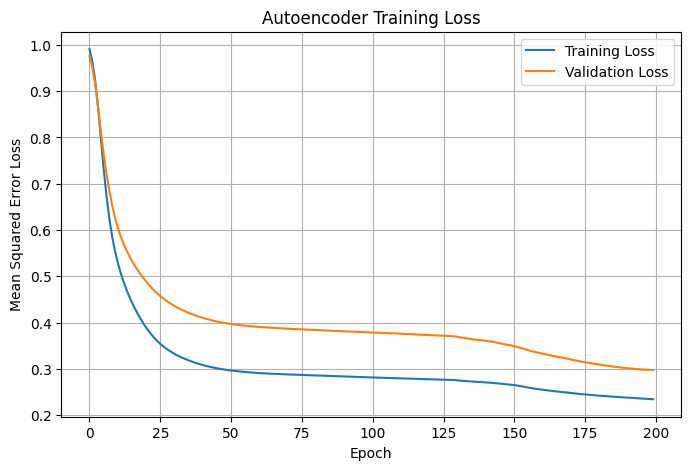

In [6]:
# Plot training & validation loss 📉🎨
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Evaluate the Autoencoder: Reconstruction 📦🔄
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)
print("Average Reconstruction Error:", np.mean(reconstruction_error))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Average Reconstruction Error: 0.29748386


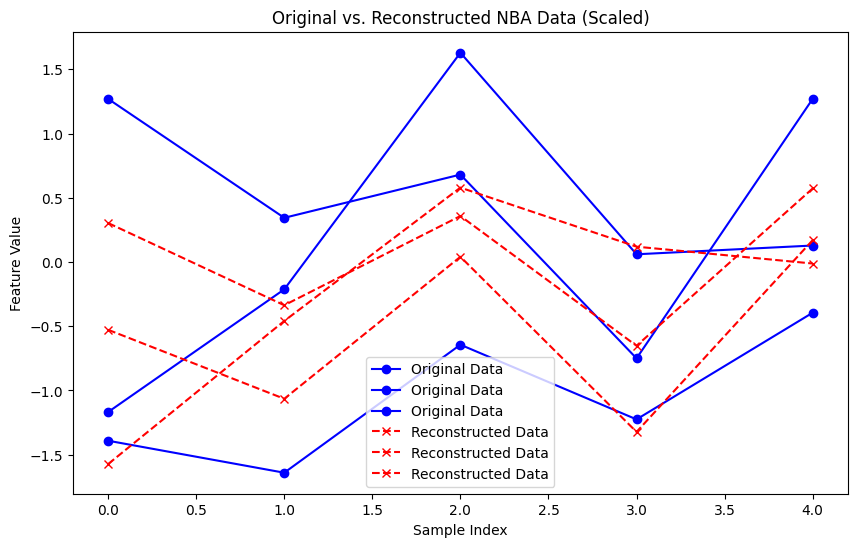

In [8]:
# Visualize Original vs. Reconstructed Data for first 5 samples 📈🤩
n_samples_to_plot = 5
plt.figure(figsize=(10,6))
plt.plot(X_test[:n_samples_to_plot], 'bo-', label="Original Data")
plt.plot(X_test_pred[:n_samples_to_plot], 'rx--', label="Reconstructed Data")
plt.title("Original vs. Reconstructed NBA Data (Scaled)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

### **Overview**


- This graph compares **original NBA data** (blue solid lines) with its **reconstructed values** (red dashed lines) after passing through a dimensionality reduction model (likely an **autoencoder** or PCA).
- **X-axis:** Sample index (first five data points).
- **Y-axis:** Feature values (scaled).


### **Key Observations**


- The **original data** (blue) and **reconstructed data** (red) follow a similar overall pattern but with **noticeable deviations**.
- Some reconstructed points are **closer to the original values**, while others show **significant shifts** (especially in lower values).
- **Feature-specific Trends**:
  - Some features are reconstructed **more accurately** (closely aligned curves).
  - Others show larger **distortions**, indicating loss of fine-grained details during compression and reconstruction.


### **Potential Issues**


- The reconstructed data **tends to smooth extreme values**, likely because the model compresses the data into a lower-dimensional latent space, causing loss of fine-grained variance.
- Some features (e.g., assists) appear **overestimated in certain cases**, while others (rebounds) are underestimated.
- **Possible Causes**:
  - **Compression loss** from reducing high-dimensional NBA stats to a lower-dimensional latent space.
  - **Model bias** toward average values during reconstruction.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


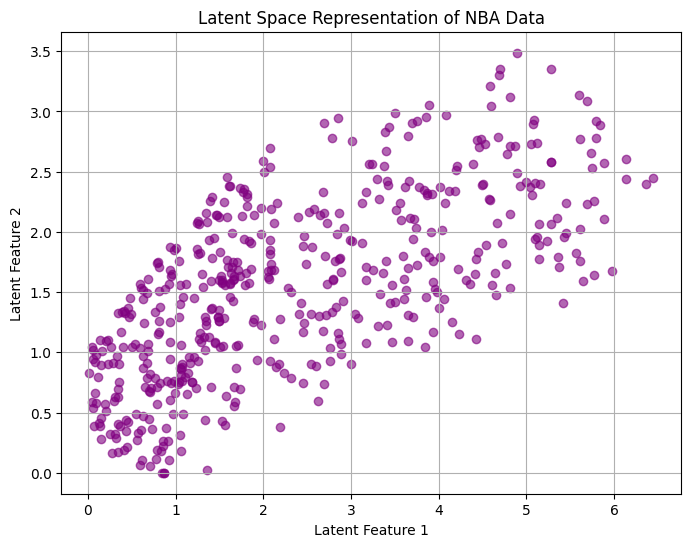

In [9]:
# Visualize the Latent Space Representations (Encoder Output) 🧠✨
encoded_data = encoder.predict(nba_data_scaled)
plt.figure(figsize=(8,6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c='purple', alpha=0.6)
plt.title("Latent Space Representation of NBA Data")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.grid(True)
plt.show()

### **Overview**


- This graph visualizes the **latent space representation** of the NBA dataset after compression.
- **X-axis:** Latent Feature 1 (compressed representation).
- **Y-axis:** Latent Feature 2 (compressed representation).
- **Each dot represents an NBA game/player in a reduced-dimensional space**.


### **Key Observations**


- **Cluster-like patterns** emerge, indicating structure within the compressed space.
- Some regions have **dense clusters**, while others are more spread out.
- **Strong correlations** between the two latent features suggest that key NBA stats (PPG, AST, REB) interact in meaningful ways.
- Some points appear **aligned along a trend**, implying that the reduced space captures underlying patterns.


### **Potential Implications**


- The latent space can be used for:
  - **Clustering similar NBA performances** (e.g., differentiating play styles).
  - **Anomaly detection** (identifying outlier games/players).
  - **Generating synthetic NBA data** by interpolating within the latent space.


In [10]:
# Denormalize and Display Some Reconstructed Samples 🏀📋
X_test_denorm = scaler.inverse_transform(X_test)
X_test_pred_denorm = scaler.inverse_transform(X_test_pred)
print("Sample Original NBA Data (first 5 samples):")
print(np.round(X_test_denorm[:5], 1))
print("Sample Reconstructed NBA Data (first 5 samples):")
print(np.round(X_test_pred_denorm[:5], 1))

Sample Original NBA Data (first 5 samples):
[[116.  13.  39.]
 [105.  10.  53.]
 [109.  22.  80.]
 [ 92.  15.  57.]
 [116.  25.  58.]]
Sample Reconstructed NBA Data (first 5 samples):
[[104.5  23.4  33.1]
 [ 96.9  16.9  49.4]
 [105.2  30.2  64.6]
 [ 93.2  13.8  57.9]
 [107.7  31.8  55.9]]


## **🔥 Final Takeaways**

1. **Autoencoders** learn to **compress (encode)** input data into a lower-dimensional space and then **reconstruct (decode)** it with minimal loss. 📦➡️🧠➡️📦  
2. They are trained to **minimize reconstruction error** (often using MSE), capturing the most important features while discarding noise. 🔍💡  
3. **Applications in ML**:  
   - **Dimensionality Reduction** for visualization or as a pre-processing step.  
   - **Denoising**: Removing noise from sensor or video data.  
   - **Anomaly Detection**: Detecting unusual patterns in sports performance or betting data.  
4. **Sports Examples**:  
   - **NBA**: Compressing player performance data to extract latent features for clustering or further prediction.  
   - **Football**: Denoising noisy match data to improve tactical analysis.  
   - **Poker**: Reducing high-dimensional betting sequences into key strategic features.  
5. **Our Python code** demonstrates a complete autoencoder pipeline: from synthetic data generation and training to visualizing loss, latent space, and reconstruction quality—all with engaging visuals and plenty of emojis! 🎉🏀⚽💥